# Importing packages and reading the Data.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('/kaggle/input/trending-baby-and-kids-items-on-etsy/etsy_baby_items_2024.csv')

In [35]:
df.head()

,url,name,Price,listedOn,favorites,numberOfReviews
0,https://www.etsy.com/listing/812451905/balu-ba...,"BALU BALL PIT - Medium, Foam ball pit child, ...",$125.43+,"Dec 11, 2023",3139.0,69.0
1,https://www.etsy.com/listing/1383548093/rainbo...,Rainbow Night Light / Newborn Gift / Nursery R...,$26.67,"Feb 10, 2024",2847.0,451.0
2,https://www.etsy.com/listing/1059851038/custom...,Custom Name Baby Onesie® Custom Text Personali...,$7.99+,"Feb 11, 2024",6298.0,3116.0
3,https://www.etsy.com/listing/1127338960/floral...,Floral Daisy Girls Personalized Name Premium U...,$9.90+,"Feb 10, 2024",39544.0,6098.0
4,https://www.etsy.com/listing/1665441647/person...,Personalized Growth Chart Wooden Growth Chart...,$31.40+,"Feb 10, 2024",127.0,NaN


In [36]:
#converting Listenon to date and time
df['listedOn'] = pd.to_datetime(df['listedOn'], errors='coerce')
df.head()

,url,name,Price,listedOn,favorites,numberOfReviews
0,https://www.etsy.com/listing/812451905/balu-ba...,"BALU BALL PIT - Medium, Foam ball pit child, ...",$125.43+,2023-12-11,3139.0,69.0
1,https://www.etsy.com/listing/1383548093/rainbo...,Rainbow Night Light / Newborn Gift / Nursery R...,$26.67,2024-02-10,2847.0,451.0
2,https://www.etsy.com/listing/1059851038/custom...,Custom Name Baby Onesie® Custom Text Personali...,$7.99+,2024-02-11,6298.0,3116.0
3,https://www.etsy.com/listing/1127338960/floral...,Floral Daisy Girls Personalized Name Premium U...,$9.90+,2024-02-10,39544.0,6098.0
4,https://www.etsy.com/listing/1665441647/person...,Personalized Growth Chart Wooden Growth Chart...,$31.40+,2024-02-10,127.0,NaN


# Data Cleaning and Preparation

In [37]:
#checking for Missing values
missing_values = df.isnull().sum()
missing_values

url                 0
name                0
Price               0
listedOn           11
favorites          29
numberOfReviews    78
dtype: int64

As we can see that we have 29 missing values in favrites and 78 missing values in numberofreviews we need to fix this for any kind of errors further.

In [38]:
#filling missing values with mean/median data
df['favorites'] = df['favorites'].fillna(df['favorites'].median())

df['numberOfReviews'] = df['numberOfReviews'].fillna(df['numberOfReviews'].median())

df.isnull().sum()

url                 0
name                0
Price               0
listedOn           11
favorites           0
numberOfReviews     0
dtype: int64

# Exploratory Data Analysis (EDA)

In [39]:
df.describe()

,listedOn,favorites,numberOfReviews
count,229,240.000000,240.000000
mean,2024-01-21 04:42:58.165938944,1282.412500,165.979167
min,2022-11-11 00:00:00,2.000000,3.000000
25%,2024-01-21 00:00:00,52.500000,14.750000
50%,2024-02-05 00:00:00,183.000000,22.000000
75%,2024-02-09 00:00:00,717.750000,44.250000
max,2024-02-11 00:00:00,39544.000000,7191.000000
std,NaN,4127.787902,743.162728


# **Feature Engineering**

In [40]:
#extracting numerical fetautes like we have + sign on the price tag 
df['Price'] = df['Price'].astype(str)

# Remove any non-numeric characters like $, £, +, and commas
df['Price'] = df['Price'].str.replace(r'[^\d.-]', '', regex=True)

# Convert the cleaned string to float, ensuring errors like empty strings are handled
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [41]:
#extracting categorical features 
df['Popular'] = df['favorites'].apply(lambda x: 1 if x > 1000 else 0)

# **Label Encoding**

In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['name_encoded'] = le.fit_transform(df['name'])

# **Time Based Features**

In [43]:
df['year'] = df['listedOn'].dt.year
df['month'] = df['listedOn'].dt.month

# **Visualizations**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


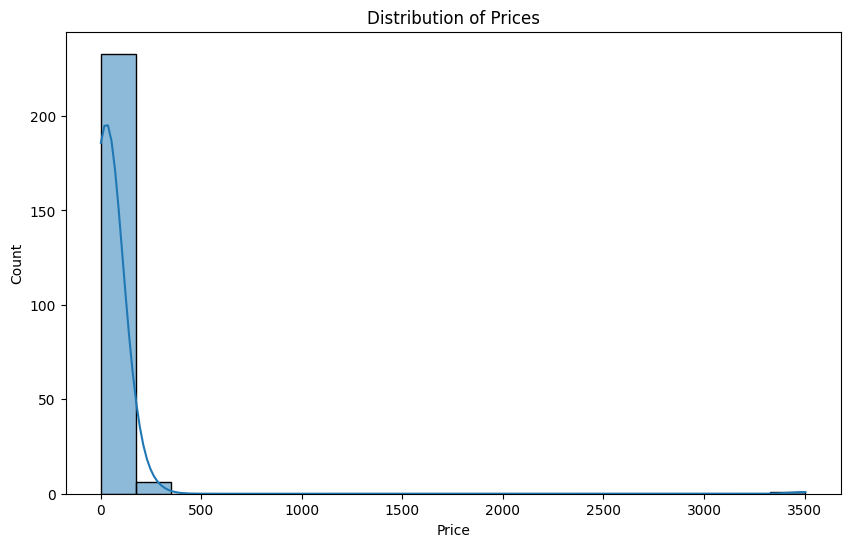

In [44]:
#distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.show()

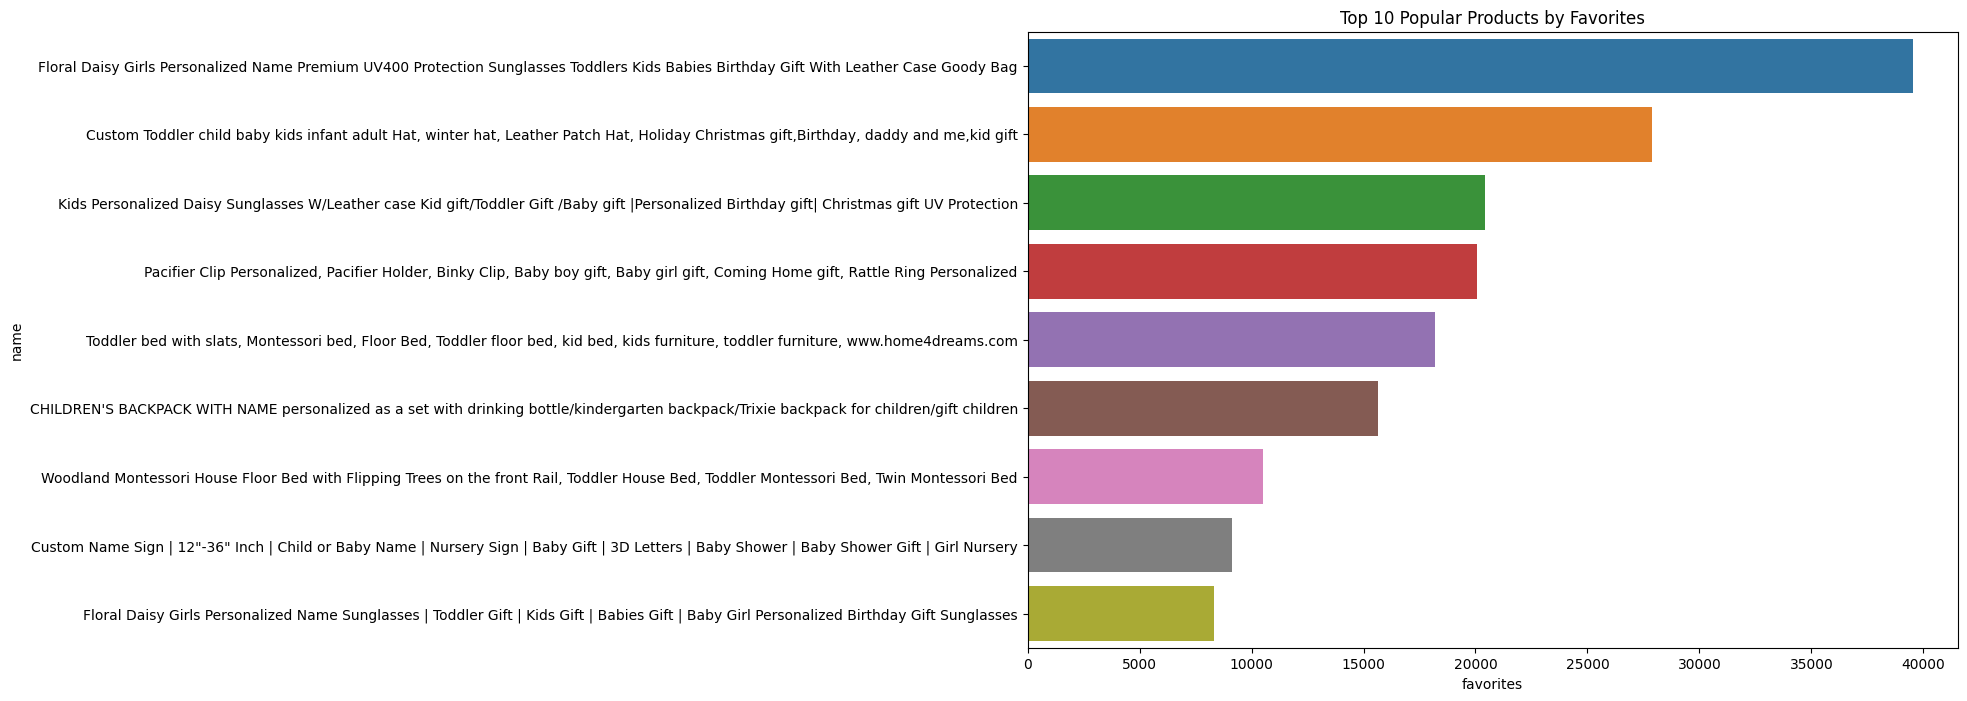

In [45]:
#top 10 popular products based on favourites 
top_10_products = df.nlargest(10, 'favorites')[['name', 'favorites']]
plt.figure(figsize=(12, 8))
sns.barplot(x='favorites', y='name', data=top_10_products)
plt.title('Top 10 Popular Products by Favorites')
plt.show()

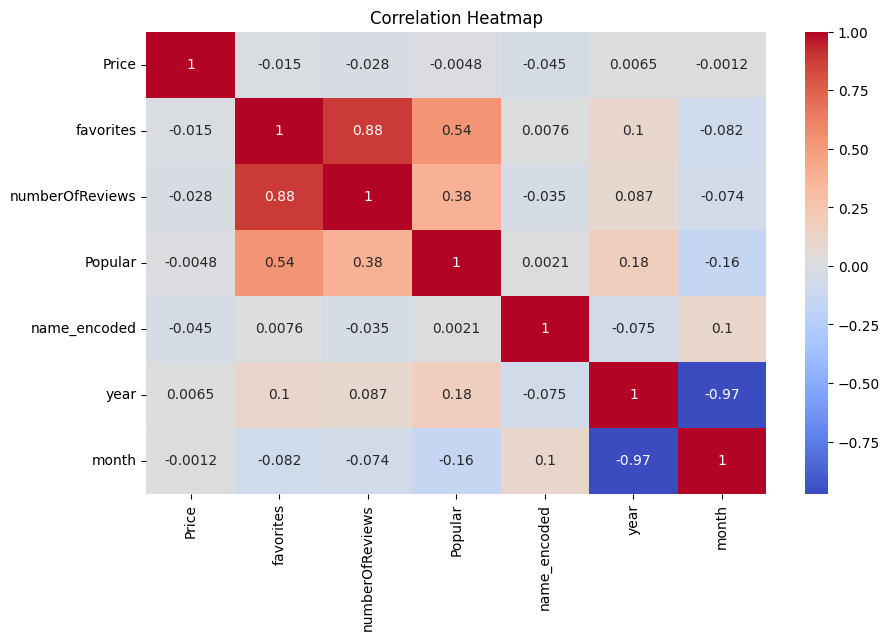

In [46]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

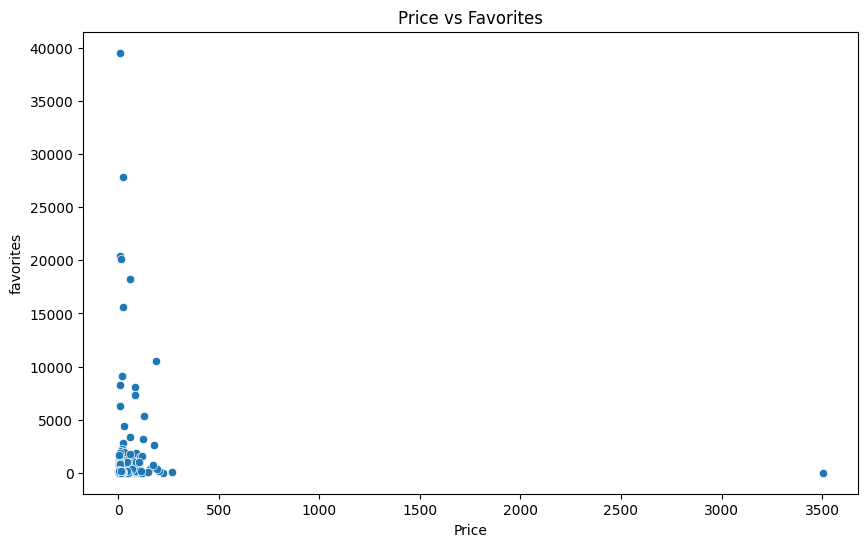

In [47]:
#favourites vs scatter plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='favorites', data=df)
plt.title('Price vs Favorites')
plt.show()

# **Machine Learning Model**

In [64]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df[['Price', 'favorites', 'numberOfReviews']]
y = df['Popular']  # Binary classification for popularity

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        10

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [92]:
# Applying Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get recommendations for all test inputs
all_recommendations = []
for sample in X_test.values:
    distances, indices = knn.kneighbors([sample])
    all_recommendations.append(indices[0])

# Convert to numpy array for easier handling
all_recommendations = np.array(all_recommendations)

# For evaluation, calculate the precision of recommendations
top_n = 5
precision_scores = []

# Define your ground truth indices for evaluation
ground_truth_indices = [0,1,2,4]  

for idx, recommended_indices in enumerate(all_recommendations):
    # Check how many of the recommended indices are in the ground truth
    relevant_recommendations = set(recommended_indices[:top_n]) & set(ground_truth_indices)
    precision = len(relevant_recommendations) / top_n  # Precision at N
    precision_scores.append(precision)

# Average precision score
average_precision = np.mean(precision_scores)
print(f"Average Precision at {top_n}: {average_precision:.2f}")

Average Precision at 5: 0.05


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

**Average precision is 0.03 means poor performance of the model we will need to enhnace our model.**

In [66]:
#using gradient boost classifier 
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_gb = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        10

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [67]:
#Using support vector classifier
from sklearn.svm import SVC

# Initialize and train Support Vector Classifier
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC Accuracy: {accuracy_svc:.2f}")
print(classification_report(y_test, y_pred_svc))

SVC Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        38
           1       1.00      0.70      0.82        10

    accuracy                           0.94        48
   macro avg       0.96      0.85      0.89        48
weighted avg       0.94      0.94      0.93        48



In [71]:
#using techniques like Grid Search or Random Search to find the optimal parameters for your models. For example, you could tune the number of estimators, learning rate, or max depth for Gradient Boosting or the kernel type and C parameter for SVC.
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters for Gradient Boosting:", grid_search.best_params_)

Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


In [72]:
#cross validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(gb, X, y, cv=5)
print(f"Cross-validated scores for Gradient Boosting: {cv_scores}")

Cross-validated scores for Gradient Boosting: [1. 1. 1. 1. 1.]


In [73]:
#feature analysis
import pandas as pd

feature_importances = pd.DataFrame(gb.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                   importance
favorites        1.000000e+00
numberOfReviews  1.766682e-16
Price            0.000000e+00


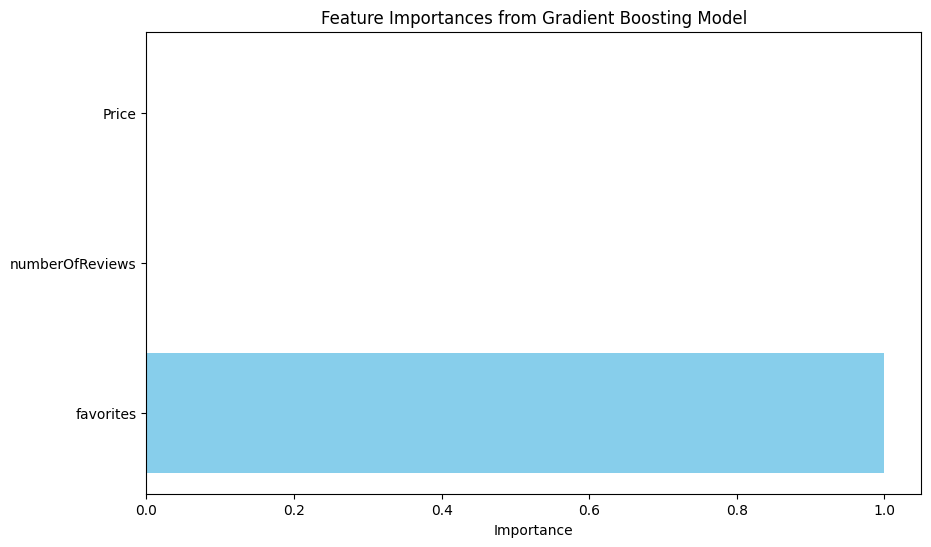

In [74]:
#analysingfeature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Gradient Boosting Model')
plt.show()

In [68]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# KNN for Recommendation
knn = NearestNeighbors(n_neighbors=5)
knn.fit(X_train)

# Predict recommendations for a sample input
sample_input = [[30, 2000, 100]] 
distances, indices = knn.kneighbors(sample_input)

# Recommended products
recommended_products = df.iloc[indices[0]]
print(recommended_products[['name', 'Price', 'favorites', 'numberOfReviews']])

                                                  name  Price  favorites  \
3    Floral Daisy Girls Personalized Name Premium U...   9.90    39544.0   
161  Mason Jar Set of 6 Baby in Bloom Garden Baby S...  90.00      196.0   
48   First Valentine's Day Baby cut file | First Va...   3.99       45.0   
42   It's A Boy cake topper, baby shower cake toppe...  19.74       12.0   
181  Personalized Leggings - Unisex Baby/Toddler/Ki...  37.28       53.0   

     numberOfReviews  
3             6098.0  
161              9.0  
48               3.0  
42              22.0  
181              7.0  


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


# **Evaultae the tuned model**

In [79]:
# Retrain the SVC model with the best parameters
best_svc = SVC(**grid_search_svc.best_params_, random_state=42)
best_svc.fit(X_train, y_train)

# Evaluate the tuned SVC model
y_pred_svc_best = best_svc.predict(X_test)
accuracy_svc_best = accuracy_score(y_test, y_pred_svc_best)
print(f"Tuned SVC Accuracy: {accuracy_svc_best:.2f}")
print(classification_report(y_test, y_pred_svc_best))

Tuned SVC Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        10

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [80]:
#hyperparameter tunning for SVC 
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}
grid_search_svc = GridSearchCV(SVC(random_state=42), param_grid_svc, cv=5)
grid_search_svc.fit(X_train, y_train)
print("Best parameters for SVC:", grid_search_svc.best_params_)

Best parameters for SVC: {'C': 0.1, 'kernel': 'linear'}


# ** Visulaize Performance Metrices **

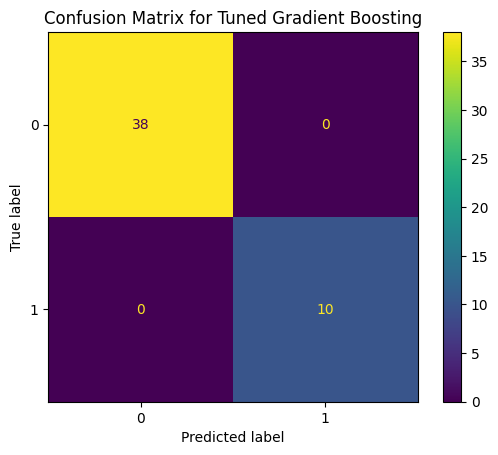

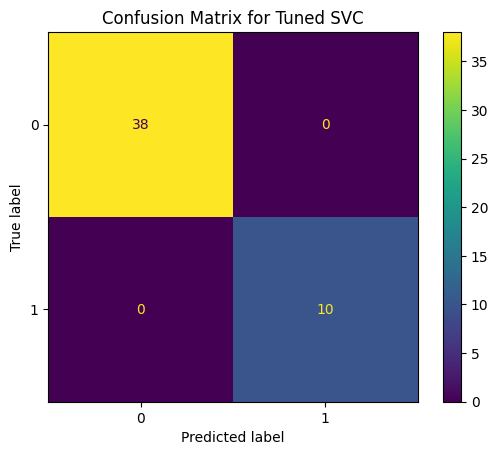

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix for Tuned Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_best)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp_gb.plot()
plt.title('Confusion Matrix for Tuned Gradient Boosting')
plt.show()

# Confusion matrix for Tuned SVC
cm_svc = confusion_matrix(y_test, y_pred_svc_best)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
disp_svc.plot()
plt.title('Confusion Matrix for Tuned SVC')
plt.show()

# **Export the trained model**

In [83]:
import pickle

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)


In [94]:
from sklearn.neighbors import KNeighborsClassifier
import pickle

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)  

with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)

In [96]:
df.columns

Index(['url', 'name', 'Price', 'listedOn', 'favorites', 'numberOfReviews'], dtype='object')

In [105]:
import pandas as pd

df = pd.read_csv('/kaggle/input/trending-baby-and-kids-items-on-etsy/etsy_baby_items_2024.csv')

df['Price'] = df['Price'].str.replace(r'[^\d.-]', '', regex=True).astype(float)

df['favorites'] = df['favorites'].fillna(0)
df['numberOfReviews'] = df['numberOfReviews'].fillna(0)

df_cleaned = df[['name', 'Price', 'favorites', 'numberOfReviews']]

df_cleaned.to_csv('cleaned_product_data.csv', index=False)

print("Cleaned CSV file created: cleaned_product_data.csv")

Cleaned CSV file created: cleaned_product_data.csv
